In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [8]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [11]:
# Dropping column which is not useful

df=df.drop(columns=['customer_id'])

# EDA

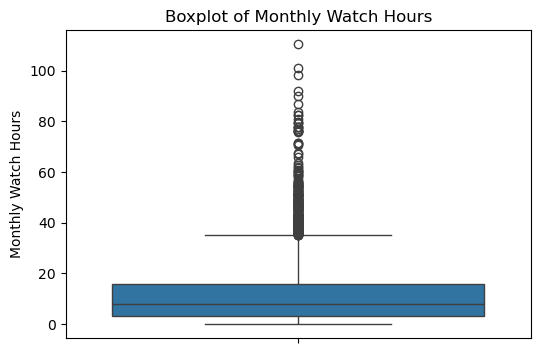

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['watch_hours'])
plt.title('Boxplot of Monthly Watch Hours')
plt.ylabel('Monthly Watch Hours')
plt.show()

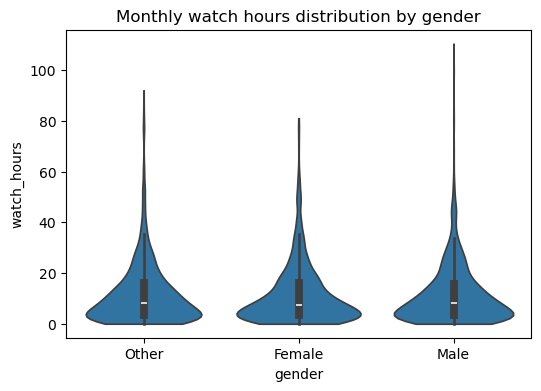

In [20]:
# Monthly watch hours of different genders
plt.figure(figsize=(6,4))
sns.violinplot(x='gender',y='watch_hours',data=df,cut=0)
plt.title("Monthly watch hours distribution by gender")
plt.show()

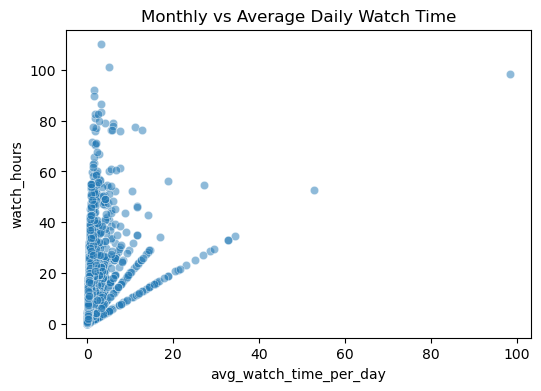

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='avg_watch_time_per_day',
    y='watch_hours',
    data=df,
    alpha=0.5
)
    
plt.title('Monthly vs Average Daily Watch Time')
plt.show()

In [43]:
(df['avg_watch_time_per_day']>24).sum()

np.int64(10)

In [44]:
#Average daily watch time was validated against real-world constraints. A small number of observations (10 out of 5000) exceeded feasible daily limits (>24 hours/day) and were treated as data inconsistencies. These rows were removed to ensure realistic and reliable behavioral data.

df=df[df['avg_watch_time_per_day'] <=24]

In [45]:
(df['avg_watch_time_per_day']>24).sum()

np.int64(0)

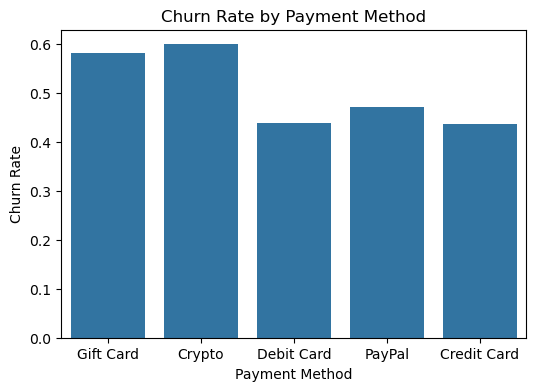

In [67]:
# Churned rate according to method of payment

plt.figure(figsize=(6,4))
sns.barplot(
    x='payment_method',
    y='churned',
    data=df,
    errorbar=None
)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')
plt.show()

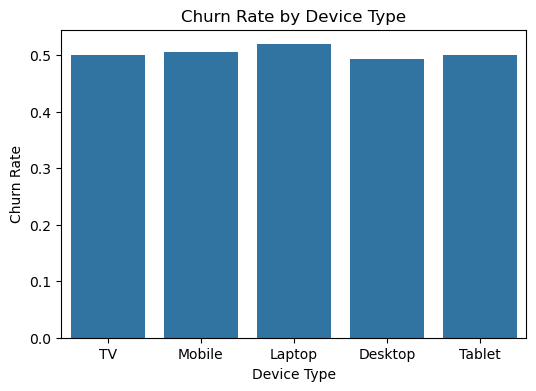

In [64]:
# Churned rate with reference to device used
plt.figure(figsize=(6,4))
sns.barplot(
    x='device',
    y='churned',
    data=df,
    errorbar=None
)
plt.xlabel('Device Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Device Type')
plt.show()

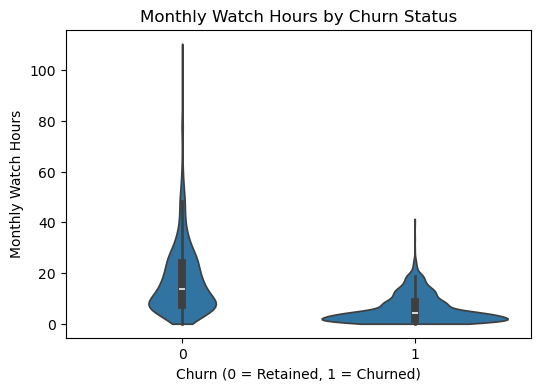

In [56]:
#  Users churned by monthly watch hours
plt.figure(figsize=(6,4))
sns.violinplot(
    x='churned',
    y='watch_hours',
    data=df,
    cut=0
)
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Monthly Watch Hours')
plt.title('Monthly Watch Hours by Churn Status')
plt.show()

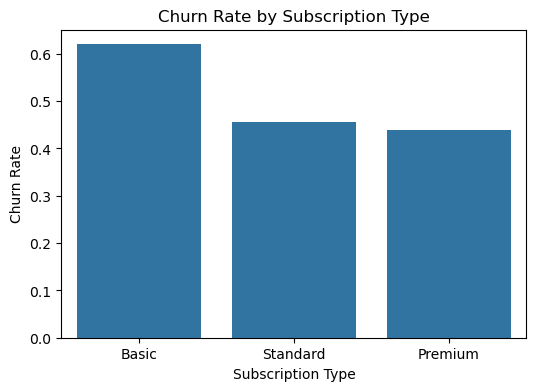

In [57]:
# Users churn rate according to their subscription type.

plt.figure(figsize=(6,4))
sns.barplot(
    x='subscription_type',
    y='churned',
    data=df,
    errorbar=None
)
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.title('Churn Rate by Subscription Type')
plt.show()

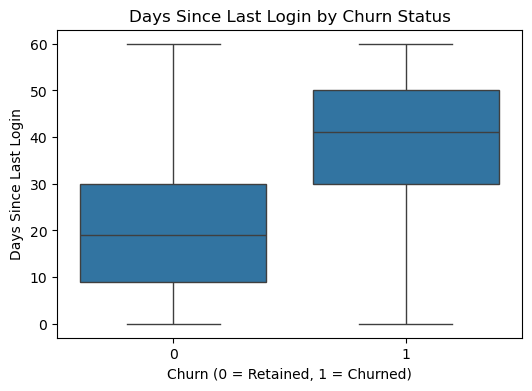

In [62]:
# Users churned according to their days of inactivity

plt.figure(figsize=(6,4))
sns.boxplot(
    x='churned',
    y='last_login_days',
    data=df,
    showfliers=False
)
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Days Since Last Login')
plt.title('Days Since Last Login by Churn Status')
plt.show()

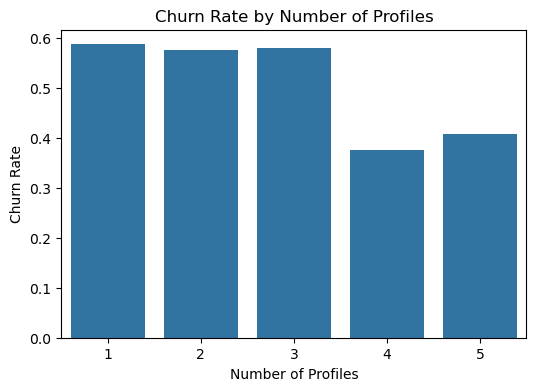

In [66]:
# Churned rate according to number of profiles

plt.figure(figsize=(6,4))
sns.barplot(
    x='number_of_profiles',
    y='churned',
    data=df,
    errorbar=None
)
plt.xlabel('Number of Profiles')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Profiles')
plt.show()

In [68]:
df.to_csv('churn_eda.csv')